In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
lum = pd.read_csv('lumclass.csv', sep='\t', index_col=0)
lum['LX'] = [np.log10(n*(10**42)) for n in lum['LX']]
# lum['class'] = ['leg', 'leg', 'leg','leg', 'leg', 'leg', 'heg', 'heg','heg','heg','heg','heg','heg','heg']
# lum.to_csv('lumclass.csv', sep='\t', columns=['LX', 'LOIII', 'class'])

lum

,LX,LOIII,class
0,43.630417,40.60,leg
1,43.640723,40.14,leg
2,43.627163,40.14,leg
3,43.615961,40.94,leg
4,43.626351,40.70,leg
5,43.614329,39.21,leg
6,43.641602,42.18,heg
7,43.630144,41.00,heg
8,43.645965,41.45,heg
9,43.637292,40.55,heg


In [30]:
from sklearn.preprocessing import LabelEncoder

X = lum.drop('class', axis=1).values
y = lum['class'].values

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

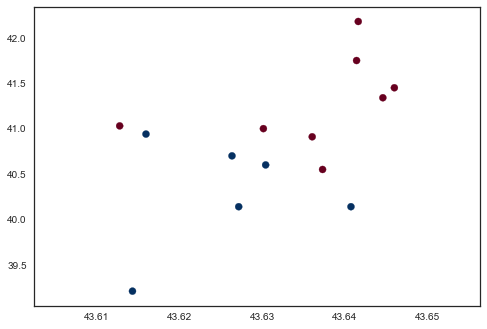

In [32]:
plt.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu")
plt.show()

In [33]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# Fitting the Regression Model to the dataset
logreg = LogisticRegression()

logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.66666666666666663

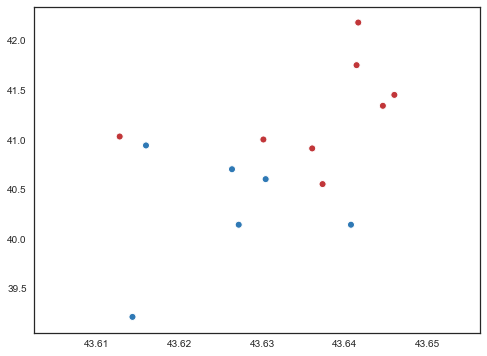

In [50]:
import seaborn as sns
sns.set(style="white")
xx, yy = np.mgrid[39:44:.01, 39:44:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
# ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

# ax.set(aspect="equal",
# #        xlim=(-5, 5), ylim=(-5, 5),
#        xlabel="$L_x$", ylabel="$L_OIII$")


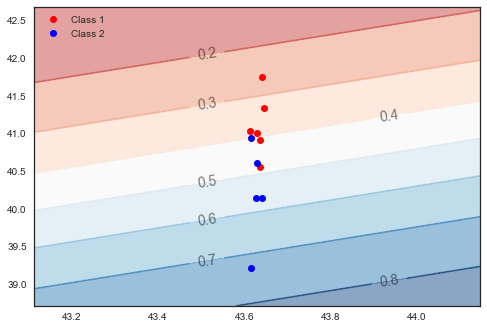

In [52]:
# evenly sampled points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#plot background colors
ax = plt.gca()
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

# Plot the points
ax.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'ro', label='Class 1')
ax.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'bo', label='Class 2')

# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

In [51]:
# 95% confidence intervals
print(np.percentile(logreg.predict(X_test), [2.5, 97.5]))


[ 0.  0.]
